In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('results/sim_trace.csv')

In [51]:
df_link = pd.read_csv('results/sim_trace_link.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 15 columns):
id                2004 non-null int64
type              2004 non-null object
app               2004 non-null int64
module            2004 non-null object
message           2004 non-null object
DES.src           2004 non-null int64
DES.dst           2004 non-null int64
TOPO.src          2004 non-null int64
TOPO.dst          2004 non-null int64
module.src        2004 non-null object
service           2004 non-null float64
time_in           2004 non-null float64
time_out          2004 non-null float64
time_emit         2004 non-null float64
time_reception    2004 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 235.0+ KB


In [42]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [43]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [44]:
df.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:03:36,9,COMP_M,5,5_19,M.USER.APP.5,8,32,187,153,None,...,216.696023,219.341988,100.000000,216.696023,116.696023,0.0,2.645965,2.645965,119.341988,1970-01-01 00:03:36
1970-01-01 00:03:39,9,COMP_M,5,5_24,5_(19-24),32,37,153,153,5_19,...,219.341988,221.429996,219.341988,219.341988,0.000000,0.0,2.088009,2.088009,2.088009,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_25,5_(19-25),32,38,153,153,5_19,...,219.341988,222.668620,219.341988,219.341988,0.000000,0.0,3.326633,3.326633,3.326633,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_20,5_(19-20),32,33,153,153,5_19,...,219.341988,225.323286,219.341988,219.341988,0.000000,0.0,5.981298,5.981298,5.981298,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_22,5_(19-22),32,35,153,153,5_19,...,219.341988,223.012955,219.341988,219.341988,0.000000,0.0,3.670967,3.670967,3.670967,1970-01-01 00:03:39


In [45]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [46]:
df_resample.shape

(198, 1)

In [47]:
timeLatency = df_resample.time_latency.values

In [48]:
df_resample.time_latency

date
1970-01-01 00:03:20      25.649618
1970-01-01 00:05:00     123.153204
1970-01-01 00:06:40     169.483224
1970-01-01 00:08:20      73.535792
1970-01-01 00:10:00      98.970859
                          ...     
1970-01-01 05:25:00    4178.329644
1970-01-01 05:26:40    6258.814693
1970-01-01 05:28:20    2863.651649
1970-01-01 05:30:00    3217.990873
1970-01-01 05:31:40    5910.691361
Freq: 100S, Name: time_latency, Length: 198, dtype: float64

In [49]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

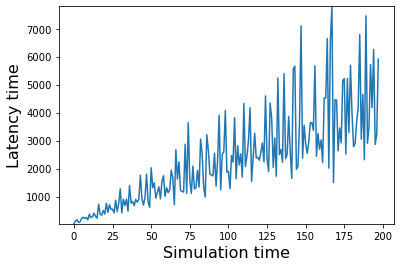

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

In [52]:
df_link.head(10)

,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,169,112,0,72.484938,M.USER.APP.0,100.0,1939754,0
1,2,LINK,196,185,1,49.030431,M.USER.APP.1,100.0,4121726,1
2,3,LINK,195,175,2,40.989709,M.USER.APP.2,100.0,2969127,2
3,4,LINK,172,64,2,76.989709,M.USER.APP.2,100.0,2969127,3
4,5,LINK,178,107,2,77.484564,M.USER.APP.2,100.0,2969127,4
5,6,LINK,194,190,3,28.689508,M.USER.APP.3,100.0,2758030,5
6,7,LINK,196,185,3,48.689507,M.USER.APP.3,100.0,2758030,6
7,8,LINK,169,112,4,72.993107,M.USER.APP.4,100.0,3972429,7
8,9,LINK,187,112,5,32.995455,M.USER.APP.5,100.0,2986364,8
9,10,LINK,194,190,6,28.576881,M.USER.APP.6,100.0,2307525,9
